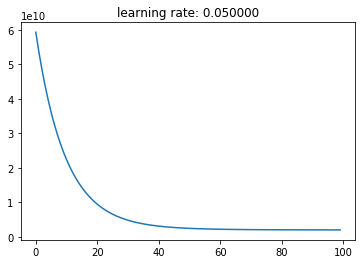

In [39]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def feature_normlization(X): #特征缩放
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0, ddof=1)
    X_norm = (X - mu)/sigma 
    return X_norm

def cost_function(X, Y, theta): #代价函数的计算
    cost = X@theta - Y
    m = X.shape[0]
    total_cost = cost.T.dot(cost)/(2*m)
    return total_cost[0][0]

def gradient_descent(X, Y, theta, alpha, iterations): #梯度下降
   
    m = len(X)
    J_history = list()
    for i in range(iterations):
        cost = X@theta - Y
        theta = theta - np.transpose((cost.T@X)*(alpha/m))
        J_history.append(cost_function(X, Y, theta))
    
    return J_history, theta

def learningRatePlot(X_norm, Y): #不同学习速率下的梯度下降比较
    %matplotlib inline
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    plt.figure()
    iter_num = 50
    
    for i, al in enumerate([0.01, 0.03, 0.1, 0.3, 1]):
        ta = np.zeros((X_norm.shape[1], 1))
        ta, J_history = gradient_descent(X_norm, Y, ta, al, iter_num)
 
        plt.plot([i for i in range(len(J_history))], J_history, colors[i], label=str(al))
 
    plt.title("learning rate")
    plt.legend()
    plt.show()

def normalEquation(X, Y): #正规方程
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

if __name__ == '__main__':
    data_path = r'D:\code\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt'
    data = pandas.read_csv(data_path, delimiter=",", header=None)
 
    # 切分特征和目标
    X = data.iloc[:, 0:2].values
    Y = data.iloc[:, 2:3].values
    X_norm = feature_normlization(X)
    ones = np.ones((X_norm.shape[0], 1))# 假设函数中考虑截距，给每个样本增加一个为1的特征
    X_norm = np.c_[ones, X_norm]
    theta = np.zeros((X_norm.shape[1], 1))
    alpha = 0.05
    iterations = 100
    J_history,theta = gradient_descent(X_norm, Y, theta, alpha, iterations)
    plt.figure()
    plt.plot([i for i in range(len(J_history))], J_history)
    plt.title("learning rate: %f" % alpha)
    plt.show()